
1-regroupement des produits 
2-evolution des importations et exportations par temps par pays
3-structure d'importation 
4-carte mondiale (si je zoome sur un pays on trouve un graphe) 
5-dependances du maroc pp au d'autres pays ( espagne france ...) 
6-importation par produit par continent 
flux entre le maroc et lafrique
je dois personnaliser les graphes




In [ ]:
import plotly as py
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot  as plt
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv("/content/ExportData.csv", error_bad_lines=False, sep=";",decimal=',')
df

,Code du groupement d'utilisation,Libellé du groupement d'utilisation,Continent,Code du pays,Libellé du pays,Libellé du flux,Valeur DHS Janvier 2017,Valeur DHS Février 2017,Valeur DHS Mars 2017,Valeur DHS Avril 2017,Valeur DHS Mai 2017,Valeur DHS Juin 2017,Valeur DHS Juillet 2017,Valeur DHS Aout 2017,Valeur DHS Septembre 2017,Valeur DHS Octobre 2017,Valeur DHS Novembre 2017,Valeur DHS Décembre 2017,Valeur DHS Janvier 2018,Valeur DHS Février 2018,Valeur DHS Mars 2018,Valeur DHS Avril 2018,Valeur DHS Mai 2018,Valeur DHS Juin 2018,Valeur DHS Juillet 2018,Valeur DHS Aout 2018,Valeur DHS Septembre 2018,Valeur DHS Octobre 2018,Valeur DHS Novembre 2018,Valeur DHS Décembre 2018,Valeur DHS Janvier 2019,Valeur DHS Février 2019,Valeur DHS Mars 2019,Valeur DHS Avril 2019,Valeur DHS Mai 2019,Valeur DHS Juin 2019,Valeur DHS Juillet 2019,Valeur DHS Aout 2019,Valeur DHS Septembre 2019,Valeur DHS Octobre 2019,Valeur DHS Novembre 2019,Valeur DHS Décembre 2019,Valeur DHS Janvier 2020,Valeur DHS Février 2020,Valeur DHS Mars 2020,Valeur DHS Avril 2020,Valeur DHS Mai 2020,Valeur DHS Juin 2020,Valeur DHS Juillet 2020,Valeur DHS Aout 2020,Valeur DHS Septembre 2020,Valeur DHS Octobre 2020,Valeur DHS Novembre 2020,Valeur DHS Décembre 2020,Valeur DHS Janvier 2021,Valeur DHS Février 2021,Valeur DHS Mars 2021,Valeur DHS Avril 2021,Valeur DHS Mai 2021,Valeur DHS Juin 2021,Valeur DHS Juillet 2021,Valeur DHS Aout 2021,Valeur DHS Septembre 2021,Valeur DHS Octobre 2021,Valeur DHS Novembre 2021,Valeur DHS Décembre 2021,Unnamed: 66
0,1,"ALIMENTATION, BOISSONS ET TABACS",AFRIQUE,BI,BURUNDI,Exportations FAB,0.000000e+00,0.000000e+00,0.00,635842.00,0.0,0.000000e+00,0.00,0.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.0,0.00,0.00,0.000000e+00,0.00,0.000000e+00,0.00,0.00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0.0,0.00,0.0,0.000000e+00,0.0,0.00,0,0,0,0,0,0,NaN
1,1,"ALIMENTATION, BOISSONS ET TABACS",AFRIQUE,CG,CONGO,Exportations FAB,1.194676e+07,2.289422e+07,20323828.00,16317828.38,14910204.0,4.119740e+06,8222747.00,3518725.0,14973587.0,2.727746e+06,4405184.00,20973940.00,2788506.00,11003095.00,13971511.0,2465507.00,3364015.00,7387408.00,8548275.00,1.454123e+07,6.784590e+06,5968066.00,1.434453e+07,1.000217e+07,4556041.41,2.472283e+06,7.876590e+06,6384891.00,2.754778e+06,3411303.0,4334698.00,6453573.00,1.405118e+06,7933765.00,1.259760e+07,12053392.00,4553227.50,5.221913e+06,7.923496e+06,3755479.0,1.045308e+07,9698075.00,6881029.0,6548814.00,8120945.0,2.939903e+06,7871585.0,7162149.0,2004591.0,4620712.00,14958340.0,1.189530e+07,1852215.0,2408827.00,0,0,0,0,0,0,NaN
2,1,"ALIMENTATION, BOISSONS ET TABACS",AFRIQUE,EG,EGYPTE,Exportations FAB,3.969433e+07,8.853948e+06,6498343.00,5477035.00,5559366.0,8.606638e+06,2439865.00,14590863.0,11614166.0,7.747933e+06,18738722.00,13377530.48,10212892.00,5935231.00,9981706.0,9763426.86,2636835.00,9662580.00,12594782.00,1.262941e+07,8.641748e+06,15898101.93,2.181625e+07,2.565634e+07,25614000.00,2.086607e+07,1.758529e+07,8906629.00,1.060232e+07,14523875.0,13005204.00,18196088.00,1.733052e+07,22920651.00,2.418146e+07,27050645.00,22018589.00,2.041840e+07,1.917799e+07,14276757.0,1.879466e+07,23171409.36,18395776.0,11670873.38,23010887.0,1.668727e+07,18781260.0,25451424.0,9575629.0,13350990.00,22259547.0,1.717942e+07,19306660.0,9804884.00,0,0,0,0,0,0,NaN
3,1,"ALIMENTATION, BOISSONS ET TABACS",AFRIQUE,LR,LIBERIA,Exportations FAB,1.840271e+06,9.462880e+05,3415500.20,1580497.00,3959041.0,3.730417e+06,1682603.00,4057969.8,838892.0,5.476544e+06,1021216.00,1864157.75,1347355.00,338648.00,3521668.0,8699533.63,5217538.64,1181310.68,2349198.30,3.273367e+06,2.914816e+06,1568179.00,1.927259e+06,3.350569e+06,965163.00,1.728632e+06,3.419663e+06,3872474.91,3.148627e+06,492005.0,2800130.25,3448504.24,4.696870e+05,3389745.62,1.248288e+06,3384100.48,1366902.00,2.674533e+06,1.994162e+06,960261.0,7

In [ ]:
df.shape

(2269, 67)


data preprocessing



In [ ]:
df.isnull().sum().sort_values()

Code du groupement d'utilisation        0
Unité complementaire Mai 2020           0
Poids en KG Juin 2020                   0
Valeur DHS Juin 2020                    0
Unité complementaire Juin 2020          0
                                    ...  
Poids en KG Octobre 2018                0
Libellé du groupe CTCI                  2
Libellé de la division CTCI             2
Code du pays                           32
Unnamed: 147                        60483
Length: 148, dtype: int64

In [ ]:
(df==0).sum().sort_values(ascending=False)


Unité complementaire Aout 2021       60483
Valeur DHS Septembre 2021            60483
Poids en KG Juillet 2021             60483
Valeur DHS Juillet 2021              60483
Unité complementaire Juillet 2021    60483
                                     ...  
Code du pays                             0
Libellé du pays                          0
Code du flux                             0
Libellé du flux                          0
Code du groupement d'utilisation         0
Length: 148, dtype: int64

In [ ]:
df.dtypes
df_numeric=df.dtypes[df.dtypes=="int64"].index


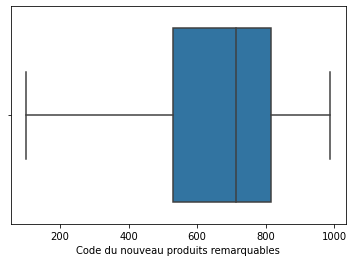

In [ ]:
sns.boxplot(x=df[df_numeric[1]])


data visualization

In [ ]:
df_expo=df[df['Libellé du flux']=='Exportations FAB']
df_impo=df[df['Libellé du flux']=='Importations CAF']

In [ ]:
group_imp=df_impo.groupby("Continent").sum()
group_imp

,Code du groupement d'utilisation,Valeur DHS Janvier 2017,Valeur DHS Février 2017,Valeur DHS Mars 2017,Valeur DHS Avril 2017,Valeur DHS Mai 2017,Valeur DHS Juin 2017,Valeur DHS Juillet 2017,Valeur DHS Aout 2017,Valeur DHS Septembre 2017,Valeur DHS Octobre 2017,Valeur DHS Novembre 2017,Valeur DHS Décembre 2017,Valeur DHS Janvier 2018,Valeur DHS Février 2018,Valeur DHS Mars 2018,Valeur DHS Avril 2018,Valeur DHS Mai 2018,Valeur DHS Juin 2018,Valeur DHS Juillet 2018,Valeur DHS Aout 2018,Valeur DHS Septembre 2018,Valeur DHS Octobre 2018,Valeur DHS Novembre 2018,Valeur DHS Décembre 2018,Valeur DHS Janvier 2019,Valeur DHS Février 2019,Valeur DHS Mars 2019,Valeur DHS Avril 2019,Valeur DHS Mai 2019,Valeur DHS Juin 2019,Valeur DHS Juillet 2019,Valeur DHS Aout 2019,Valeur DHS Septembre 2019,Valeur DHS Octobre 2019,Valeur DHS Novembre 2019,Valeur DHS Décembre 2019,Valeur DHS Janvier 2020,Valeur DHS Février 2020,Valeur DHS Mars 2020,Valeur DHS Avril 2020,Valeur DHS Mai 2020,Valeur DHS Juin 2020,Valeur DHS Juillet 2020,Valeur DHS Aout 2020,Valeur DHS Septembre 2020,Valeur DHS Octobre 2020,Valeur DHS Novembre 2020,Valeur DHS Décembre 2020,Valeur DHS Janvier 2021,Valeur DHS Février 2021,Valeur DHS Mars 2021,Valeur DHS Avril 2021,Valeur DHS Mai 2021,Valeur DHS Juin 2021,Valeur DHS Juillet 2021,Valeur DHS Aout 2021,Valeur DHS Septembre 2021,Valeur DHS Octobre 2021,Valeur DHS Novembre 2021,Valeur DHS Décembre 2021,Unnamed: 66
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFRIQUE,1344,1.229036e+09,1.166490e+09,1.420414e+09,1.279525e+09,1.421421e+09,1.429442e+09,1.207777e+09,1.311850e+09,1.212059e+09,1.045965e+09,1.204866e+09,1.256522e+09,1.623709e+09,1.764697e+09,1.518496e+09,1.767550e+09,1.683418e+09,1.341070e+09,1.265996e+09,1.276175e+09,1.561031e+09,1.717116e+09,1.868507e+09,1.531146e+09,1.349877e+09,1.210693e+09,1.647582e+09,2.133736e+09,1.602753e+09,1.172484e+09,1.643408e+09,1.587027e+09,1.325120e+09,1.384303e+09,1.430094e+09,1.438298e+09,1.515216e+09,1.236146e+09,1.360234e+09,1.227051e+09,8.194597e+08,9.243556e+08,1.162901e+09,1.088254e+09,1.049675e+09,1.240718e+09,1.056768e+09,1.305853e+09,1.186171e+09,1.322000e+09,1.768193e+09,1.888558e+09,1.347158e+09,1.589648e+09,0,0,0,0,0,0,0.0
AMERIQUE,963,3.544766e+09,3.284844e+09,6.165884e+09,4.643319e+09,5.248621e+09,5.234239e+09,4.758211e+09,4.297712e+09,3.281471e+09,4.155891e+09,3.734284e+09,4.330832e+09,4.102380e+09,3.856944e+09,4.466597e+09,3.868965e+09,4.693577e+09,3.905824e+09,4.967265e+09,5.610196e+09,4.782742e+09,5.338554e+09,4.935293e+09,5.788099e+09,4.526085e+09,3.285261e+09,5.964931e+09,5.043565e+09,4.342256e+09,7.244125e+09,4.952977e+09,5.418162e+09,5.019978e+09,4.977966e+09,3.577418e+09,4.293858e+09,4.570587e+09,4.156555e+09,4.644009e+09,4.716866e+09,3.720989e+09,4.904697e+09,3.548473e+09,3.982532e+09,3.924764e+09,3.160714e+09,3.897952e+09,3.977522e+09,4.188182e+09,3.670838e+09,5.500291e+09,5.671287e+09,5.315000e+09,4.589668e+09,0,0,0,0,0,0,0.0
ASIE,1325,7.592378e+09,6.413119e+09,7.271106e+09,6.146427e+09,7.144388e+09,6.187297e+09,6.041781e+09,6.399999e+09,7.584276e+09,6.634666e+09,7.200351e+09,6.693307e+09,6.867903e+09,9.237743e+09,6.790083e+09,6.815894e+09,8.208308e+09,8.160032e+09,8.530533e+09,9.103210e+09,7.350414e+09,7.322150e+09,7.251137e+09,8.591886e+09,8.597144e+09,8.377800e+09,9.909928e+09,8.516035e+09,8.413344e+09,8.446997e+09,8.709766e+09,8.130932e+09,9.050787e+09,8.332711e+09,7.770969e+09,9.622595e+09,9.749613e+09,8.248706e+09,7.012350e+09,6.302304e+09,7.002455e+09,8.301969e+09,6.891552e+09,6.685361e+09,7.065750e+09,7.225922e+09,7.600724e+09,8.327144e+09,7.852553e+09,7.377503e+09,1.014333e+10,8.914491e+09,1.084470e+10,1.017653e+10,0,0,0,0,0,0,0.0
AUSTRALIE,207,1.223529e+08,9.887313e+07,9.113534e+07,7.122637e+07,1.772436e+08,5.075041e+07,6.951402e+07,1.201557e+08,7.884649e+07,6.360898e+07,1.039986e+08,7.506425e+07,8.485362e+07,7.636871e+07,7.160320e+07,8.551715e+07,5.215106e+07,5.315714e+07,4.630857e+07,4.495218e+07,6.449347e+07,3.901719e+07,5.48109

In [ ]:
group_imp.index


Index(['AFRIQUE', 'AMERIQUE', 'ASIE', 'AUSTRALIE', 'EUROPE'], dtype='object', name='Continent')

valeur totale des importations par continent

In [ ]:
afrique_impo=df_impo[df_impo["Continent"]=='AFRIQUE']
EUROPE_impo=df_impo[df_impo["Continent"]=='EUROPE']
ASIE_impo=df_impo[df_impo["Continent"]=='ASIE']
am_impo=df_impo[df_impo["Continent"]=='AMERIQUE']


In [ ]:
af_impoVA=afrique_impo.loc[:, afrique_impo.columns.str.startswith('Valeur')]
eu_impoVA=EUROPE_impo.loc[:, EUROPE_impo.columns.str.startswith('Valeur')]
as_impoVA=ASIE_impo.loc[:, ASIE_impo.columns.str.startswith('Valeur')]
am_impoVA=am_impo.loc[:, am_impo.columns.str.startswith('Valeur')]

In [ ]:
af_impoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des importations en DHS":af_impoVA.iloc[:,0].sum()})
eu_impoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des importations en DHS":eu_impoVA.iloc[:,0].sum()}) 
as_impoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des importations en DHS":as_impoVA.iloc[:,0].sum()}) 
am_impoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des importations en DHS":am_impoVA.iloc[:,0].sum()}) 

for i in range(len(af_impoVA2)):
  af_impoVA2.loc[:,('valeur totale des importations en DHS')][i]=af_impoVA.iloc[:,i].sum()
  eu_impoVA2.loc[:,('valeur totale des importations en DHS')][i]=eu_impoVA.iloc[:,i].sum()
  as_impoVA2.loc[:,('valeur totale des importations en DHS')][i]=as_impoVA.iloc[:,i].sum()
  am_impoVA2.loc[:,('valeur totale des importations en DHS')][i]=am_impoVA.iloc[:,i].sum()



af_impoVA2['continent']='AFRIQUE'
eu_impoVA2['continent']='EUROPE'
as_impoVA2['continent']='ASIE'
am_impoVA2['continent']='AMERIQUE'


continent_valeur=pd.concat([eu_impoVA2,af_impoVA2,as_impoVA2,am_impoVA2],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is tryi

In [ ]:
continent_valeur



,Date,valeur totale des importations en DHS,continent
0,2017-01-31,2.236588e+10,EUROPE
1,2017-02-28,2.110867e+10,EUROPE
2,2017-03-31,2.637509e+10,EUROPE
3,2017-04-30,2.506692e+10,EUROPE
4,2017-05-31,2.468365e+10,EUROPE
...,...,...,...
187,2020-08-31,3.982532e+09,AMERIQUE
188,2020-09-30,3.924764e+09,AMERIQUE
189,2020-10-31,3.160714e+09,AMERIQUE
190,2020-11-30,3.897952e+09,AMERIQUE


In [ ]:
import plotly.express as px

fig = px.line(continent_valeur, x="Date", y="valeur totale des importations en DHS",color='continent')

fig.show()

valeur totale des exportations par pays 


In [ ]:
afrique_expo=df_expo[df_expo["Continent"]=='AFRIQUE']
EUROPE_expo=df_expo[df_expo["Continent"]=='EUROPE']
ASIE_expo=df_expo[df_expo["Continent"]=='ASIE']
am_expo=df_expo[df_expo["Continent"]=='AMERIQUE']
af_expoVA=afrique_expo.loc[:, afrique_expo.columns.str.startswith('Valeur')]
eu_expoVA=EUROPE_expo.loc[:, EUROPE_expo.columns.str.startswith('Valeur')]
as_expoVA=ASIE_expo.loc[:, ASIE_expo.columns.str.startswith('Valeur')]
am_expoVA=am_expo.loc[:, am_expo.columns.str.startswith('Valeur')]

In [ ]:
af_expoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des exportations en DHS":af_expoVA.iloc[:,0].sum()})
eu_expoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des exportations en DHS":eu_expoVA.iloc[:,0].sum()}) 
as_expoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des exportations en DHS":as_expoVA.iloc[:,0].sum()}) 
am_expoVA2= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des exportations en DHS":am_expoVA.iloc[:,0].sum()}) 

In [ ]:
af_expoVA2
for i in range(len(af_expoVA2)):
  af_expoVA2.loc[:,("valeur totale des exportations en DHS")][i]=af_expoVA.iloc[:,i].sum()
  eu_expoVA2.loc[:,("valeur totale des exportations en DHS")][i]=eu_expoVA.iloc[:,i].sum()
  as_expoVA2.loc[:,("valeur totale des exportations en DHS")][i]=as_expoVA.iloc[:,i].sum()
  am_expoVA2.loc[:,("valeur totale des exportations en DHS")][i]=am_expoVA.iloc[:,i].sum()


af_expoVA2['continent']='AFRIQUE'
eu_expoVA2['continent']='EUROPE'
as_expoVA2['continent']='ASIE'
am_expoVA2['continent']='AMERIQUE'


continent_valeurex=pd.concat([eu_expoVA2,af_expoVA2,as_expoVA2,am_expoVA2],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

In [ ]:

fig = px.line(continent_valeurex, x="Date", y='valeur totale des exportations en DHS',color='continent')

fig.show()

In [ ]:
def evolution_mois(année,flux):
  data =df_impo 
  if flux=='Exportations FAB':
    data=df_expo
  data2=data.loc[:, data.columns.str.startswith('Valeur')]
  mois_evolution= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                          periods=48,freq='M'
                                    ),"valeur totale en DHS":data2.iloc[:,0].sum()})

  for i in range(len(mois_evolution)):
    mois_evolution.loc[:,("valeur totale en DHS")][i]=data2.iloc[:,i].sum()
  j=0
  if année== 2017: j=0
  if année== 2018: j=12
  if année== 2019: j=24
  if année==2020: j=36
  mois_evolution=mois_evolution.iloc[0+j:12+j,:]

  return mois_evolution
evolution_mois(2018,'Importations CAF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,valeur totale en DHS
12,2018-01-31,3.684095e+10
13,2018-02-28,4.104394e+10
14,2018-03-31,4.112022e+10
15,2018-04-30,4.055230e+10
16,2018-05-31,4.301056e+10
17,2018-06-30,3.803763e+10
18,2018-07-31,3.907465e+10
19,2018-08-31,3.771830e+10
20,2018-09-30,3.611114e+10
21,2018-10-31,4.184515e+10


In [ ]:

fig = go.Figure(data=[
    go.Bar(name='valeur des produits importés', x=evolution_mois(2018,'Importations CAF')["Date"], y=evolution_mois(2018,'Exportations CAF')["valeur totale en DHS"]),
    go.Bar(name='valeur des produits exportés', x=evolution_mois(2018,'Exportations FAB')["Date"], y=evolution_mois(2018,'Exportations FAB')["valeur totale en DHS"])
])
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



repartission des produits importés en 2018 

In [ ]:
test=df_impo.groupby("Libellé du groupement d'utilisation").sum()
df_impo2018=test.loc[:, test.columns.str.startswith('Valeur') & test.columns.str.endswith('2018')]
df_impo2018.sum(axis=1)

Libellé du groupement d'utilisation
ALIMENTATION, BOISSONS ET TABACS                4.556607e+10
DEMI  PRODUITS                                  9.985908e+10
ENERGIE  ET  LUBRIFIANTS                        8.054759e+10
OR INDUSTRIEL                                   1.768339e+08
PRODUITS BRUTS D'ORIGINE ANIMALE ET VEGETALE    1.327617e+10
PRODUITS BRUTS D'ORIGINE MINERALE               1.132741e+10
PRODUITS FINIS D'EQUIPEMENT AGRICOLE            2.372374e+09
PRODUITS FINIS D'EQUIPEMENT INDUSTRIEL          1.178427e+11
PRODUITS FINIS DE CONSOMMATION                  1.084626e+11
dtype: float64

In [ ]:
fig = px.pie(values=df_impo2018.sum(axis=1), names=df_impo2018.sum(axis=1).index)
fig.show()

In [ ]:
df_impo=df[df['Libellé du flux']=='Importations CAF']
année=2018
test=df_impo.groupby("Libellé du groupement d'utilisation").sum()
df_impo2018=test.loc[:, test.columns.str.startswith('Valeur') & test.columns.str.endswith(str(année))]
df_impo2018.sum(axis=1)
fig = px.pie(values=df_impo2018.sum(axis=1), names=df_impo2018.sum(axis=1).index)
fig.show()

evolution de l'importation d'un produit fixe

In [ ]:
impo1=df_impo[df_impo['Libellé du groupement d\'utilisation']=="ALIMENTATION, BOISSONS ET TABACS"]

In [ ]:
impoo=impo1.loc[:, impo1.columns.str.startswith('Valeur')]
impoo1= pd.DataFrame({"Date":pd.date_range(start='2017-01-01',
                                        periods=48,freq='M'
                                  ),
                   "valeur totale des importations en DHS":impoo.iloc[:,0].sum()})
for i in range(len(impoo1)):
  impoo1.loc[:,('valeur totale des importations en DHS')][i]=impoo.iloc[:,i].sum()

impoo1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,valeur totale des importations en DHS
0,2017-01-31,3.052786e+09
1,2017-02-28,3.221590e+09
2,2017-03-31,4.653436e+09
3,2017-04-30,5.778201e+09
4,2017-05-31,3.831048e+09
5,2017-06-30,2.690030e+09
6,2017-07-31,3.305994e+09
7,2017-08-31,2.653641e+09
8,2017-09-30,2.677834e+09
9,2017-10-31,3.309434e+09


In [ ]:
fig = px.bar(impoo1, x='Date', y="valeur totale des importations en DHS")

fig.show()



map

In [ ]:
iso_alpha=pd.read_csv(r'C:\Users\dell\Downloads\sql-pays.csv')
iso_alpha=iso_alpha.iloc[:,3:5]
iso_alpha=iso_alpha.rename(columns={'AFG':'iso_alpha3','Afghanistan':'Libellé du pays'})
iso_alpha.iloc[0]=['AFG','Afghanistan']
dict = {'iso_alpha3': 'Vikram', 'Libellé du pays': 'YOUGOUSLAVIE	'}
iso_alpha = iso_alpha.append(dict, ignore_index = True)
iso_alpha['Libellé du pays'] = iso_alpha['Libellé du pays'].str.upper()
cols = iso_alpha.select_dtypes(include=[np.object]).columns
iso_alpha[cols] = iso_alpha[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


In [ ]:

data_flux=fct_flux('Exportations FAB')
mapdata=pd.merge(data_flux,iso_alpha,how='outer',on='Libellé du pays')
mapdata=mapdata.dropna()
mapdata

,Libellé du pays,Code du pays,Continent,valeur_DH,année,flux,iso_alpha3
0,AFGHANISTAN,AF,ASIE,1.947118e+06,2017.0,Exportations FAB,AFG
1,AFGHANISTAN,AF,ASIE,1.075705e+06,2018.0,Exportations FAB,AFG
2,AFGHANISTAN,AF,ASIE,1.572238e+06,2019.0,Exportations FAB,AFG
3,AFGHANISTAN,AF,ASIE,3.775600e+05,2020.0,Exportations FAB,AFG
4,AFRIQUE DU SUD,ZA,AFRIQUE,3.943971e+08,2017.0,Exportations FAB,ZAF
...,...,...,...,...,...,...,...
823,ZAMBIE,ZM,AFRIQUE,2.866710e+06,2020.0,Exportations FAB,ZMB
824,ZIMBABWE,ZW,AFRIQUE,1.573700e+04,2017.0,Exportations FAB,ZWE
825,ZIMBABWE,ZW,AFRIQUE,4.257520e+05,2018.0,Exportations FAB,ZWE
826,ZIMBABWE,ZW,AFRIQUE,6.894695e+06,2019.0,Exportations FAB,ZWE


In [ ]:
import plotly.express as px
fig = px.scatter_geo(mapdata, locations="iso_alpha3", color="Continent",opacity= .8,
                     hover_name ="Libellé du pays",size='valeur_DH',hover_data=['valeur_DH','Libellé du pays'], projection="natural earth",animation_frame='année')
fig.show()

new

In [ ]:

def fct_data(année,flux):
    df_impo_ex=df[df['Libellé du flux']==flux]
    data=df_impo_ex.loc[:, df_impo_ex.columns.str.startswith('Valeur')& df_impo_ex.columns.str.endswith(année)]
    dataa=df_impo_ex.loc[:,['Libellé du pays','Continent','Code du pays']]
    datayear=pd.concat([data,dataa],axis=1)
    s=datayear.groupby(['Libellé du pays','Code du pays','Continent']).sum().sum(axis=1)
    s=s.reset_index()
    s=s.rename(columns={0:'valeur_DH'})
    s['année']=int(année)
    s['flux']=flux
    return s
def fct_flux(flux):
    return pd.concat([fct_data('2017',flux),fct_data('2018',flux),fct_data('2019',flux),fct_data('2020',flux)])
      
result=pd.concat([fct_flux('Exportations FAB'),fct_flux('Importations CAF')])

evolution=result.groupby(['flux','année']).sum().reset_index()
evolution

import plotly.express as px

fig_2 = px.line(evolution, x="année", y="valeur_DH", color='flux')
fig_2.update_layout(
    title="commerce extérieur du Maroc",
    xaxis_title="année",
    yaxis_title="valeur en Millions de DH"
    )
fig_2.update_traces(mode='lines+markers')
fig_2.update_xaxes(type='category')
fig_2.show()
result



,Libellé du pays,Code du pays,Continent,valeur_DH,année,flux
0,AFGHANISTAN,AF,ASIE,1.947118e+06,2017,Exportations FAB
1,AFRIQUE DU SUD,ZA,AFRIQUE,3.943971e+08,2017,Exportations FAB
2,ALBANIE,AL,EUROPE,2.343199e+07,2017,Exportations FAB
3,ALGERIE,DZ,AFRIQUE,1.945608e+09,2017,Exportations FAB
4,ALLEMAGNE,DE,EUROPE,7.014674e+09,2017,Exportations FAB
...,...,...,...,...,...,...
212,VIET NAM,VN,ASIE,2.551373e+09,2020,Importations CAF
213,YEMEN,YE,ASIE,8.347000e+03,2020,Importations CAF
214,YOUGOUSLAVIE,YU,EUROPE,3.220000e+04,2020,Importations CAF
215,ZAMBIE,ZM,AFRIQUE,3.867400e+04,2020,Importations CAF


In [ ]:
fig = px.bar(result, x="Continent", y="valeur_DH", 
              color="flux",barmode = 'group')
  
fig.update_traces(marker_line_width = 0)


In [ ]:
s=fct_flux('Importations CAF').rename(columns={"valeur_DH":"importationDH"})

scatterdata=pd.merge(s.drop('flux',axis=1),fct_flux('Exportations FAB').rename(columns={"valeur_DH":"exportationDH"}).drop('flux',axis=1),how='outer',on=['Libellé du pays','année','Continent','Code du pays'])
m=scatterdata.dropna()
fig=px.scatter(m, x="importationDH", y="exportationDH",animation_frame="année", color="Continent",hover_name="Libellé du pays",template="plotly_dark")
fig.show()


continent=m[m['année']==2018].drop('année',axis=1).groupby('Continent').sum()

continent.reset_index(inplace=True)
  
continent
m

,Libellé du pays,Code du pays,Continent,importationDH,année,exportationDH
0,AFGHANISTAN,AF,ASIE,8.487700e+04,2017,1.947118e+06
1,AFRIQUE DU SUD,ZA,AFRIQUE,9.675933e+08,2017,3.943971e+08
2,ALBANIE,AL,EUROPE,1.671487e+07,2017,2.343199e+07
3,ALGERIE,DZ,AFRIQUE,5.353025e+09,2017,1.945608e+09
4,ALLEMAGNE,DE,EUROPE,2.644018e+10,2017,7.014674e+09
...,...,...,...,...,...,...
863,VIET NAM,VN,ASIE,2.551373e+09,2020,4.112417e+07
864,YEMEN,YE,ASIE,8.347000e+03,2020,3.572999e+07
865,YOUGOUSLAVIE,YU,EUROPE,3.220000e+04,2020,0.000000e+00
866,ZAMBIE,ZM,AFRIQUE,3.867400e+04,2020,2.866710e+06
